## Import necessary libraries

In [1]:
!pip install lightgbm

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# # Data Collection

In [3]:
# Load the dataset
file_path = r'DATASET\Medicare_Physician_Other_Practitioners_by_Provider_2022.csv'
df = pd.read_csv(file_path)

C:\Users\0877\AppData\Local\Temp\ipykernel_10560\2852632548.py:3: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Analyze the dataset

In [4]:
# Count of rows, columns
df.shape

(1230293, 82)

In [5]:
# Column names
df.columns

Index(['Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
       'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
       'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Tot_HCPCS_Cds', 'Tot_Benes',
       'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt',
       'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Sprsn_Ind',
       'Drug_Tot_HCPCS_Cds', 'Drug_Tot_Benes', 'Drug_Tot_Srvcs',
       'Drug_Sbmtd_Chrg', 'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt',
       'Drug_Mdcr_Stdzd_Amt', 'Med_Sprsn_Ind', 'Med_Tot_HCPCS_Cds',
       'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg',
       'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt',
       'Bene_Avg_Age', 'Bene_Age_LT_65_

In [6]:
# Retrive first 5 rows
df.head()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Parkinson_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,M,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,...,50.0,48.0,75.0,75.0,51.0,13.0,5.0,53.0,30.0,2.5578
1,1003000134,Cibull,Thomas,L,M.D.,M,I,2650 Ridge Ave,Evanston Hospital,Evanston,...,22.0,11.0,74.0,62.0,20.0,16.0,2.0,42.0,6.0,1.0960
2,1003000142,Khalil,Rashid,NaN,M.D.,M,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,...,43.0,22.0,68.0,75.0,31.0,15.0,NaN,75.0,8.0,1.5455
3,1003000423,Velotta,Jennifer,A,M.D.,F,I,11100 Euclid Ave,NaN,Cleveland,...,NaN,NaN,66.0,66.0,NaN,22.0,0.0,41.0,NaN,0.8531
4,1003000480,Rothchild,Kevin,B,MD,M,I,12605 E 16th Ave,NaN,Aurora,...,32.0,17.0,67.0,71.0,26.0,15.0,NaN,64.0,NaN,1.7034


 There are 1230293 rows and 82 columns are there.
 
 
 Here is a description of each column in this dataset:

1. **`Rndrng_NPI`**: National Provider Identifier (NPI) of the rendering provider, a unique 10-digit identification number assigned to healthcare providers in the United States.

2. **`Rndrng_Prvdr_Last_Org_Name`**: Last name or organizational name of the rendering provider.

3. **`Rndrng_Prvdr_First_Name`**: First name of the rendering provider.

4. **`Rndrng_Prvdr_MI`**: Middle initial of the rendering provider.

5. **`Rndrng_Prvdr_Crdntls`**: Credentials of the rendering provider, such as MD, DO, or NP.

6. **`Rndrng_Prvdr_Gndr`**: Gender of the rendering provider (e.g., Male, Female).

7. **`Rndrng_Prvdr_Ent_Cd`**: Entity code indicating whether the provider is an individual or an organization.

8. **`Rndrng_Prvdr_St1`**: First line of the street address for the rendering provider.

9. **`Rndrng_Prvdr_St2`**: Second line of the street address for the rendering provider, if applicable.

10. **`Rndrng_Prvdr_City`**: City where the rendering provider is located.

11. **`Rndrng_Prvdr_State_Abrvtn`**: Abbreviation of the state where the rendering provider is located.

12. **`Rndrng_Prvdr_State_FIPS`**: Federal Information Processing Standards (FIPS) code for the state where the rendering provider is located.

13. **`Rndrng_Prvdr_Zip5`**: The 5-digit ZIP code of the rendering provider's location.

14. **`Rndrng_Prvdr_RUCA`**: Rural-Urban Commuting Area code indicating the rural or urban status of the provider's location.

15. **`Rndrng_Prvdr_RUCA_Desc`**: Description of the Rural-Urban Commuting Area (RUCA) code.

16. **`Rndrng_Prvdr_Cntry`**: Country where the rendering provider is located.

17. **`Rndrng_Prvdr_Type`**: Type or specialty of the rendering provider (e.g., Internal Medicine, Cardiology).

18. **`Rndrng_Prvdr_Mdcr_Prtcptg_Ind`**: Indicator of whether the provider is a Medicare participant.

19. **`Tot_HCPCS_Cds`**: Total number of Healthcare Common Procedure Coding System (HCPCS) codes billed by the provider.

20. **`Tot_Benes`**: Total number of unique Medicare beneficiaries served by the provider.

21. **`Tot_Srvcs`**: Total number of services provided by the rendering provider.

22. **`Tot_Sbmtd_Chrg`**: Total amount of charges submitted by the provider for all services.

23. **`Tot_Mdcr_Alowd_Amt`**: Total amount that Medicare allowed for the services provided.

24. **`Tot_Mdcr_Pymt_Amt`**: Total amount Medicare paid to the provider.

25. **`Tot_Mdcr_Stdzd_Amt`**: Standardized amount Medicare uses to adjust payments for geographical differences.

26. **`Drug_Sprsn_Ind`**: Indicator if drug data is suppressed due to privacy or data issues.

27. **`Drug_Tot_HCPCS_Cds`**: Total number of unique drug HCPCS codes billed by the provider.

28. **`Drug_Tot_Benes`**: Total number of Medicare beneficiaries who received drugs from the provider.

29. **`Drug_Tot_Srvcs`**: Total number of drug-related services provided.

30. **`Drug_Sbmtd_Chrg`**: Total submitted charges for drug-related services.

31. **`Drug_Mdcr_Alowd_Amt`**: Total Medicare-allowed amount for drug-related services.

32. **`Drug_Mdcr_Pymt_Amt`**: Total Medicare payments made for drug-related services.

33. **`Drug_Mdcr_Stdzd_Amt`**: Standardized amount Medicare uses for drug payments, adjusted for geographical differences.

34. **`Med_Sprsn_Ind`**: Indicator if medical data is suppressed due to privacy or data issues.

35. **`Med_Tot_HCPCS_Cds`**: Total number of unique medical HCPCS codes billed by the provider.

36. **`Med_Tot_Benes`**: Total number of Medicare beneficiaries who received medical services from the provider.

37. **`Med_Tot_Srvcs`**: Total number of medical services provided.

38. **`Med_Sbmtd_Chrg`**: Total submitted charges for medical services.

39. **`Med_Mdcr_Alowd_Amt`**: Total amount Medicare allowed for medical services.

40. **`Med_Mdcr_Pymt_Amt`**: Total amount Medicare paid for medical services.

41. **`Med_Mdcr_Stdzd_Amt`**: Standardized amount Medicare uses for medical payments, adjusted for geographical differences.

42. **`Bene_Avg_Age`**: Average age of the Medicare beneficiaries served by the provider.

43. **`Bene_Age_LT_65_Cnt`**: Count of Medicare beneficiaries under the age of 65.

44. **`Bene_Age_65_74_Cnt`**: Count of Medicare beneficiaries aged 65 to 74.

45. **`Bene_Age_75_84_Cnt`**: Count of Medicare beneficiaries aged 75 to 84.

46. **`Bene_Age_GT_84_Cnt`**: Count of Medicare beneficiaries over the age of 84.

47. **`Bene_Feml_Cnt`**: Count of female Medicare beneficiaries.

48. **`Bene_Male_Cnt`**: Count of male Medicare beneficiaries.

49. **`Bene_Race_Wht_Cnt`**: Count of Medicare beneficiaries identified as White.

50. **`Bene_Race_Black_Cnt`**: Count of Medicare beneficiaries identified as Black.

51. **`Bene_Race_API_Cnt`**: Count of Medicare beneficiaries identified as Asian/Pacific Islander.

52. **`Bene_Race_Hspnc_Cnt`**: Count of Medicare beneficiaries identified as Hispanic.

53. **`Bene_Race_NatInd_Cnt`**: Count of Medicare beneficiaries identified as Native American/Alaskan Native.

54. **`Bene_Race_Othr_Cnt`**: Count of Medicare beneficiaries identified as Other race.

55. **`Bene_Dual_Cnt`**: Count of Medicare beneficiaries who are dual-eligible for both Medicare and Medicaid.

56. **`Bene_Ndual_Cnt`**: Count of Medicare beneficiaries who are not dual-eligible (Medicare only).

57. **`Bene_CC_BH_ADHD_OthCD_V1_Pct`**: Percentage of Medicare beneficiaries with attention deficit hyperactivity disorder (ADHD) or other conduct disorders.

58. **`Bene_CC_BH_Alcohol_Drug_V1_Pct`**: Percentage of Medicare beneficiaries with alcohol or drug use disorders.

59. **`Bene_CC_BH_Tobacco_V1_Pct`**: Percentage of Medicare beneficiaries with tobacco use disorder.

60. **`Bene_CC_BH_Alz_NonAlzdem_V2_Pct`**: Percentage of Medicare beneficiaries with Alzheimer’s disease or other non-Alzheimer's dementia.

61. **`Bene_CC_BH_Anxiety_V1_Pct`**: Percentage of Medicare beneficiaries with an anxiety disorder.

62. **`Bene_CC_BH_Bipolar_V1_Pct`**: Percentage of Medicare beneficiaries with bipolar disorder.

63. **`Bene_CC_BH_Mood_V2_Pct`**: Percentage of Medicare beneficiaries with mood disorders (e.g., major depression, dysthymia).

64. **`Bene_CC_BH_Depress_V1_Pct`**: Percentage of Medicare beneficiaries with depression.

65. **`Bene_CC_BH_PD_V1_Pct`**: Percentage of Medicare beneficiaries with personality disorders.

66. **`Bene_CC_BH_PTSD_V1_Pct`**: Percentage of Medicare beneficiaries with post-traumatic stress disorder (PTSD).

67. **`Bene_CC_BH_Schizo_OthPsy_V1_Pct`**: Percentage of Medicare beneficiaries with schizophrenia or other psychotic disorders.

68. **`Bene_CC_PH_Asthma_V2_Pct`**: Percentage of Medicare beneficiaries with asthma.

69. **`Bene_CC_PH_Afib_V2_Pct`**: Percentage of Medicare beneficiaries with atrial fibrillation (Afib).

70. **`Bene_CC_PH_Cancer6_V2_Pct`**: Percentage of Medicare beneficiaries with one of the six types of cancer tracked.

71. **`Bene_CC_PH_CKD_V2_Pct`**: Percentage of Medicare beneficiaries with chronic kidney disease (CKD).

72. **`Bene_CC_PH_COPD_V2_Pct`**: Percentage of Medicare beneficiaries with chronic obstructive pulmonary disease (COPD).

73. **`Bene_CC_PH_Diabetes_V2_Pct`**: Percentage of Medicare beneficiaries with diabetes.

74. **`Bene_CC_PH_HF_NonIHD_V2_Pct`**: Percentage of Medicare beneficiaries with heart failure not related to ischemic heart disease (IHD).

75. **`Bene_CC_PH_Hyperlipidemia_V2_Pct`**: Percentage of Medicare beneficiaries with hyperlipidemia (high cholesterol).

76. **`Bene_CC_PH_Hypertension_V2_Pct`**: Percentage of Medicare beneficiaries with hypertension (high blood pressure).

77. **`Bene_CC_PH_IschemicHeart_V2_Pct`**: Percentage of Medicare beneficiaries with ischemic heart disease (IHD), which includes conditions like coronary artery disease.

78. **`Bene_CC_PH_Osteoporosis_V2_Pct`**: Percentage of Medicare beneficiaries with osteoporosis.

79. **`Bene_CC_PH_Parkinson_V2_Pct`**: Percentage of Medicare beneficiaries with Parkinson's disease.

80. **`Bene_CC_PH_Arthritis_V2_Pct`**: Percentage of Medicare beneficiaries with arthritis.

81. **`Bene_CC_PH_Stroke_TIA_V2_Pct`**: Percentage of Medicare beneficiaries with a history of stroke or transient ischemic attack (TIA).

82. **`Bene_Avg_Risk_Scre`**: Average risk score for the Medicare beneficiaries served by the provider, which reflects the relative health status and expected healthcare costs.

In [7]:
# Number of unique values for every object columns
original_columns = df.select_dtypes(include='object').columns

for col in original_columns:
    unique_values = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_values}")

Number of unique values in Rndrng_Prvdr_Last_Org_Name: 294376
Number of unique values in Rndrng_Prvdr_First_Name: 82081
Number of unique values in Rndrng_Prvdr_MI: 31
Number of unique values in Rndrng_Prvdr_Crdntls: 18204
Number of unique values in Rndrng_Prvdr_Gndr: 2
Number of unique values in Rndrng_Prvdr_Ent_Cd: 2
Number of unique values in Rndrng_Prvdr_St1: 427550
Number of unique values in Rndrng_Prvdr_St2: 59993
Number of unique values in Rndrng_Prvdr_City: 12948
Number of unique values in Rndrng_Prvdr_State_Abrvtn: 62
Number of unique values in Rndrng_Prvdr_State_FIPS: 116
Number of unique values in Rndrng_Prvdr_Zip5: 33469
Number of unique values in Rndrng_Prvdr_RUCA_Desc: 15
Number of unique values in Rndrng_Prvdr_Cntry: 23
Number of unique values in Rndrng_Prvdr_Type: 103
Number of unique values in Rndrng_Prvdr_Mdcr_Prtcptg_Ind: 2
Number of unique values in Drug_Sprsn_Ind: 2
Number of unique values in Med_Sprsn_Ind: 2


In this dataset;
Rndrng_NPI column provides unique objects, Rndrng_Prvdr_Last_Org_Name, Rndrng_Prvdr_First_Name columns are provides names, So those columns are no need. So we can drop those. Rndrng_Prvdr_Crdntls, Rndrng_Prvdr_St1, Rndrng_Prvdr_St2 columns are contains so much unique object values. Rndrng_Prvdr_City, Rndrng_Prvdr_State_Abrvtn, Rndrng_Prvdr_State_FIPS, Rndrng_Prvdr_Zip5, Rndrng_Prvdr_RUCA_Desc, Rndrng_Prvdr_Cntry columns are providing address details, Drug_Sprsn_Ind, Med_Sprsn_Ind columns are not providing valid data. So those columns are also no need. we can drop those columns.

# # Data Preprocessing

In [8]:
# drop columns
columns_to_drop = ["Rndrng_NPI", "Rndrng_Prvdr_Last_Org_Name", "Rndrng_Prvdr_First_Name", "Rndrng_Prvdr_Crdntls", "Rndrng_Prvdr_St1", "Rndrng_Prvdr_St2", "Rndrng_Prvdr_City", "Rndrng_Prvdr_State_Abrvtn", "Rndrng_Prvdr_State_FIPS", "Rndrng_Prvdr_Zip5", "Rndrng_Prvdr_RUCA_Desc", "Rndrng_Prvdr_Cntry", "Drug_Sprsn_Ind", "Med_Sprsn_Ind"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
# Retrieve first 5 rows
df.head()

,Rndrng_Prvdr_MI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,...,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Parkinson_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre
0,NaN,M,I,1.0,Internal Medicine,Y,22,420,881.0,324882.56,...,50.0,48.0,75.0,75.0,51.0,13.0,5.0,53.0,30.0,2.5578
1,L,M,I,1.0,Pathology,Y,19,2938,6809.0,1031724.00,...,22.0,11.0,74.0,62.0,20.0,16.0,2.0,42.0,6.0,1.0960
2,NaN,M,I,1.0,Anesthesiology,Y,60,405,1912.0,424337.85,...,43.0,22.0,68.0,75.0,31.0,15.0,NaN,75.0,8.0,1.5455
3,A,F,I,1.0,Obstetrics & Gynecology,Y,16,59,111.0,9918.00,...,NaN,NaN,66.0,66.0,NaN,22.0,0.0,41.0,NaN,0.8531
4,B,M,I,1.0,General Surgery,Y,37,120,194.0,257176.75,...,32.0,17.0,67.0,71.0,26.0,15.0,NaN,64.0,NaN,1.7034


In [10]:
# Count of rows, columns
df.shape

(1230293, 68)

In [11]:
# Calculate duplicate values in whole dataframe
total_duplicates = df.duplicated().sum()
total_duplicates

0

In [12]:
# Calculate total missing values and percentage of missing values

from IPython.display import display, HTML

train_total = df.isnull().sum()
train_percent = (train_total / df.shape[0]) * 100

# Create a DataFrame to hold this information
data_missing = pd.DataFrame({
    'Total nulls': train_total,
    'Percentage': train_percent
})

# Sort the DataFrame by the 'Total nulls' column in descending order
data_missing_sorted = data_missing.sort_values(by='Total nulls', ascending=False)

# Convert the DataFrame to HTML
html = data_missing_sorted.to_html()

# Display the HTML as a scrollable element
display(HTML(f"""
<div style="height:300px; overflow-y:scroll; border:1px solid black; padding:10px;">
    {html}
</div>
"""))

,Total nulls,Percentage
Bene_Race_API_Cnt,1005596,81.736302
Bene_Race_Othr_Cnt,994012,80.794738
Bene_Race_Hspnc_Cnt,926699,75.323439
Bene_Race_Black_Cnt,851623,69.221153
Bene_CC_BH_PTSD_V1_Pct,830692,67.519851
Bene_Race_NatInd_Cnt,819157,66.582269
Bene_CC_BH_ADHD_OthCD_V1_Pct,818209,66.505215
Bene_CC_BH_PD_V1_Pct,814465,66.200897
Bene_CC_PH_Parkinson_V2_Pct,757151,61.542332
Bene_CC_BH_Schizo_OthPsy_V1_Pct,723915,58.840861


C:\Users\0877\AppData\Local\Temp\ipykernel_10560\429221621.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_missing_sorted['Train Total'], y=data_missing_sorted.index, palette='viridis')


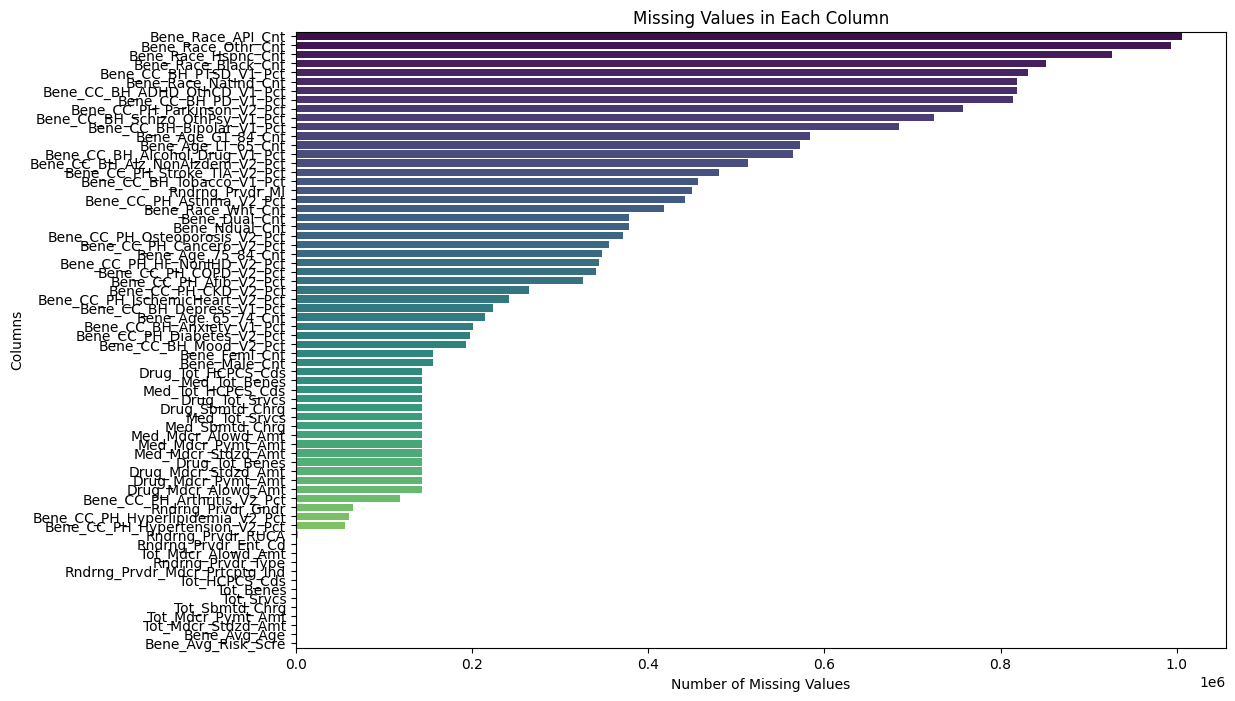

In [13]:
# Graph for missing values

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total missing values and percentage of missing values
train_total = df.isnull().sum()
train_percent = (train_total / df.shape[0]) * 100

# Create a DataFrame to hold this information
data_missing = pd.DataFrame({
    'Train Total': train_total,
    'Train Percent': train_percent
})

# Sort the DataFrame by the 'Train Total' column in descending order
data_missing_sorted = data_missing.sort_values(by='Train Total', ascending=False)

# Plotting the missing values
plt.figure(figsize=(12, 8))
sns.barplot(x=data_missing_sorted['Train Total'], y=data_missing_sorted.index, palette='viridis')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values in Each Column')
plt.show()

Bene_Race_API_Cnt, Bene_Race_Othr_Cnt, Bene_Race_Hspnc_Cnt, Bene_Race_Black_Cnt, Bene_CC_BH_PTSD_V1_Pct, Bene_Race_NatInd_Cnt, Bene_CC_BH_ADHD_OthCD_V1_Pct, Bene_CC_BH_PD_V1_Pct, Bene_CC_PH_Parkinson_V2_Pct, Bene_CC_BH_Schizo_OthPsy_V1_Pct, Bene_CC_BH_Bipolar_V1_Pct. These above columns have missing values more than 50%. So we are going to drop these columns.

In [14]:
df.drop(
    ["Bene_Race_API_Cnt", 
     "Bene_Race_Othr_Cnt", 
     "Bene_Race_Hspnc_Cnt", 
     "Bene_Race_Black_Cnt", 
     "Bene_CC_BH_PTSD_V1_Pct", 
     "Bene_Race_NatInd_Cnt", 
     "Bene_CC_BH_ADHD_OthCD_V1_Pct", 
     "Bene_CC_BH_PD_V1_Pct", 
     "Bene_CC_PH_Parkinson_V2_Pct", 
     "Bene_CC_BH_Schizo_OthPsy_V1_Pct", 
     "Bene_CC_BH_Bipolar_V1_Pct"], 
        axis=1, inplace=True)

In [15]:
# Retrieve first 5 rows
df.head()

,Rndrng_Prvdr_MI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,...,Bene_CC_PH_COPD_V2_Pct,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre
0,NaN,M,I,1.0,Internal Medicine,Y,22,420,881.0,324882.56,...,32.0,50.0,48.0,75.0,75.0,51.0,13.0,53.0,30.0,2.5578
1,L,M,I,1.0,Pathology,Y,19,2938,6809.0,1031724.00,...,9.0,22.0,11.0,74.0,62.0,20.0,16.0,42.0,6.0,1.0960
2,NaN,M,I,1.0,Anesthesiology,Y,60,405,1912.0,424337.85,...,29.0,43.0,22.0,68.0,75.0,31.0,15.0,75.0,8.0,1.5455
3,A,F,I,1.0,Obstetrics & Gynecology,Y,16,59,111.0,9918.00,...,NaN,NaN,NaN,66.0,66.0,NaN,22.0,41.0,NaN,0.8531
4,B,M,I,1.0,General Surgery,Y,37,120,194.0,257176.75,...,20.0,32.0,17.0,67.0,71.0,26.0,15.0,64.0,NaN,1.7034


In [16]:
# Find unique data types in each column
def find_column_data_types(df):
    dtype_dict = {}
    for column in df.columns:
        dtype_dict[column] = df[column].apply(type).unique()
    return dtype_dict

# Get data types
column_data_types = find_column_data_types(df)

# Print columns with more than one data type
for column, types in column_data_types.items():
    if len(types) > 1:
        print(f"'{column}' => {types}")

'Rndrng_Prvdr_MI' => [<class 'float'> <class 'str'>]
'Rndrng_Prvdr_Gndr' => [<class 'str'> <class 'float'>]


| Column Names                 | Data Types         |
|-------------------------------|--------------------|
| Rndrng_Prvdr_MI               | float, str         |
| Rndrng_Prvdr_Gndr             | str, float         |

These columns have more than one datatypes

In [17]:
# Value counts for those column's every unique values
print(df['Rndrng_Prvdr_MI'].value_counts())
print("=========================")
print(df['Rndrng_Prvdr_Gndr'].value_counts())

Rndrng_Prvdr_MI
M    94301
A    93372
J    68267
L    67975
R    49711
E    45311
S    45043
D    42317
C    41138
K    29654
B    27818
P    24940
T    22971
W    21824
G    20821
H    20550
N    19713
F    15150
V     8307
I     6458
O     5311
Y     4903
Z     1847
U     1263
Q     1121
X      577
-       15
'        8
(        5
0        3
1        1
Name: count, dtype: int64
Rndrng_Prvdr_Gndr
M    593797
F    571852
Name: count, dtype: int64


In [18]:
# Replace sepecial characters with null values
df['Rndrng_Prvdr_MI'].replace(['-', "'", '(', "0", "1"], np.nan, inplace=True)

C:\Users\0877\AppData\Local\Temp\ipykernel_10560\459573986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rndrng_Prvdr_MI'].replace(['-', "'", '(', "0", "1"], np.nan, inplace=True)


In [19]:
#label encoding the data.

# Store original column names
original_columns = ['Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Gndr']

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")
    print("====================================================")
    print("====================================================")

Mapping for column 'Rndrng_Prvdr_MI':
Label 0: A
Label 1: B
Label 2: C
Label 3: D
Label 4: E
Label 5: F
Label 6: G
Label 7: H
Label 8: I
Label 9: J
Label 10: K
Label 11: L
Label 12: M
Label 13: N
Label 14: O
Label 15: P
Label 16: Q
Label 17: R
Label 18: S
Label 19: T
Label 20: U
Label 21: V
Label 22: W
Label 23: X
Label 24: Y
Label 25: Z
Label 26: nan
Mapping for column 'Rndrng_Prvdr_Gndr':
Label 0: F
Label 1: M
Label 2: nan


In [20]:
# Function to find unique data types in each column
def find_column_data_types(df):
    dtype_dict = {}
    for column in df.columns:
        dtype_dict[column] = df[column].apply(type).unique()
    return dtype_dict

# Get data types
column_data_types = find_column_data_types(df)

# Print columns with more than one data type
for column, types in column_data_types.items():
    if len(types) > 1:
        print(f"'{column}' => {types}")
else:
    print("There is no multi data types columns")

There is no multi data types columns


In [21]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230293 entries, 0 to 1230292
Data columns (total 57 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   Rndrng_Prvdr_MI                   1230293 non-null  int32  
 1   Rndrng_Prvdr_Gndr                 1230293 non-null  int32  
 2   Rndrng_Prvdr_Ent_Cd               1230293 non-null  object 
 3   Rndrng_Prvdr_RUCA                 1228162 non-null  float64
 4   Rndrng_Prvdr_Type                 1230293 non-null  object 
 5   Rndrng_Prvdr_Mdcr_Prtcptg_Ind     1230293 non-null  object 
 6   Tot_HCPCS_Cds                     1230293 non-null  int64  
 7   Tot_Benes                         1230293 non-null  int64  
 8   Tot_Srvcs                         1230293 non-null  float64
 9   Tot_Sbmtd_Chrg                    1230293 non-null  float64
 10  Tot_Mdcr_Alowd_Amt                1230293 non-null  float64
 11  Tot_Mdcr_Pymt_Amt                 123

The columns Rndrng_Prvdr_Ent_Cd, Rndrng_Prvdr_Type, and Rndrng_Prvdr_Mdcr_Prtcptg_Ind are of object data type. Machine learning models require numerical input, so we need to convert these object columns to numeric types. To achieve this, we will implement label encoding. Label encoding will convert each unique label in these columns into a corresponding integer value. Label encoding will transform the categorical values into numerical representations, allowing us to use these columns in our model training.

In [22]:
#label encoding the data.
# Store original column names
original_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")
    print("====================================================")
    print("====================================================")

Mapping for column 'Rndrng_Prvdr_Ent_Cd':
Label 0: I
Label 1: O
Mapping for column 'Rndrng_Prvdr_Type':
Label 0: Addiction Medicine
Label 1: Adult Congenital Heart Disease
Label 2: Advanced Heart Failure and Transplant Cardiology
Label 3: All Other Suppliers
Label 4: Allergy/ Immunology
Label 5: Ambulance Service Provider
Label 6: Ambulatory Surgical Center
Label 7: Anesthesiology
Label 8: Anesthesiology Assistant
Label 9: Audiologist
Label 10: Cardiac Surgery
Label 11: Cardiology
Label 12: Centralized Flu
Label 13: Certified Clinical Nurse Specialist
Label 14: Certified Nurse Midwife
Label 15: Certified Registered Nurse Anesthetist (CRNA)
Label 16: Chiropractic
Label 17: Clinic or Group Practice
Label 18: Clinical Cardiac Electrophysiology
Label 19: Clinical Laboratory
Label 20: Colorectal Surgery (Proctology)
Label 21: Critical Care (Intensivists)
Label 22: Dentist
Label 23: Dermatology
Label 24: Diagnostic Radiology
Label 25: Emergency Medicine
Label 26: Endocrinology
Label 27: Fami

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230293 entries, 0 to 1230292
Data columns (total 57 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   Rndrng_Prvdr_MI                   1230293 non-null  int32  
 1   Rndrng_Prvdr_Gndr                 1230293 non-null  int32  
 2   Rndrng_Prvdr_Ent_Cd               1230293 non-null  int32  
 3   Rndrng_Prvdr_RUCA                 1228162 non-null  float64
 4   Rndrng_Prvdr_Type                 1230293 non-null  int32  
 5   Rndrng_Prvdr_Mdcr_Prtcptg_Ind     1230293 non-null  int32  
 6   Tot_HCPCS_Cds                     1230293 non-null  int64  
 7   Tot_Benes                         1230293 non-null  int64  
 8   Tot_Srvcs                         1230293 non-null  float64
 9   Tot_Sbmtd_Chrg                    1230293 non-null  float64
 10  Tot_Mdcr_Alowd_Amt                1230293 non-null  float64
 11  Tot_Mdcr_Pymt_Amt                 123

After label encoding those columns are converted from object to int32 datatype

In [24]:
# Retrieve firest 5 rows
df.head()

,Rndrng_Prvdr_MI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,...,Bene_CC_PH_COPD_V2_Pct,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre
0,26,1,0,1.0,44,1,22,420,881.0,324882.56,...,32.0,50.0,48.0,75.0,75.0,51.0,13.0,53.0,30.0,2.5578
1,11,1,0,1.0,73,1,19,2938,6809.0,1031724.00,...,9.0,22.0,11.0,74.0,62.0,20.0,16.0,42.0,6.0,1.0960
2,26,1,0,1.0,7,1,60,405,1912.0,424337.85,...,29.0,43.0,22.0,68.0,75.0,31.0,15.0,75.0,8.0,1.5455
3,0,0,0,1.0,63,1,16,59,111.0,9918.00,...,NaN,NaN,NaN,66.0,66.0,NaN,22.0,41.0,NaN,0.8531
4,1,1,0,1.0,30,1,37,120,194.0,257176.75,...,20.0,32.0,17.0,67.0,71.0,26.0,15.0,64.0,NaN,1.7034


In [25]:
# count of rows, columns
df.shape

(1230293, 57)

In [26]:
# Drop null values
df_cleaned = df.dropna()

In [27]:
# count of rows, columns
df_cleaned.shape

(353357, 57)

In [28]:
# Information about Dataframe
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353357 entries, 0 to 1230292
Data columns (total 57 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Rndrng_Prvdr_MI                   353357 non-null  int32  
 1   Rndrng_Prvdr_Gndr                 353357 non-null  int32  
 2   Rndrng_Prvdr_Ent_Cd               353357 non-null  int32  
 3   Rndrng_Prvdr_RUCA                 353357 non-null  float64
 4   Rndrng_Prvdr_Type                 353357 non-null  int32  
 5   Rndrng_Prvdr_Mdcr_Prtcptg_Ind     353357 non-null  int32  
 6   Tot_HCPCS_Cds                     353357 non-null  int64  
 7   Tot_Benes                         353357 non-null  int64  
 8   Tot_Srvcs                         353357 non-null  float64
 9   Tot_Sbmtd_Chrg                    353357 non-null  float64
 10  Tot_Mdcr_Alowd_Amt                353357 non-null  float64
 11  Tot_Mdcr_Pymt_Amt                 353357 non-null  float

In [29]:
# Retrieve first 5 rows
df_cleaned.head()

,Rndrng_Prvdr_MI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,...,Bene_CC_PH_COPD_V2_Pct,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre
0,26,1,0,1.0,44,1,22,420,881.0,324882.56,...,32.0,50.0,48.0,75.0,75.0,51.0,13.0,53.0,30.0,2.5578
1,11,1,0,1.0,73,1,19,2938,6809.0,1031724.00,...,9.0,22.0,11.0,74.0,62.0,20.0,16.0,42.0,6.0,1.0960
2,26,1,0,1.0,7,1,60,405,1912.0,424337.85,...,29.0,43.0,22.0,68.0,75.0,31.0,15.0,75.0,8.0,1.5455
5,12,0,0,1.0,44,1,33,355,1265.0,226234.00,...,10.0,23.0,11.0,75.0,73.0,19.0,11.0,39.0,6.0,1.1092
6,24,1,0,1.0,101,1,105,810,3035.0,965955.95,...,21.0,38.0,22.0,75.0,75.0,39.0,8.0,46.0,8.0,1.3672


In [30]:
# Copy df_cleaned dataframe as data
data = df_cleaned

In [31]:
# Information about the 'data' dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353357 entries, 0 to 1230292
Data columns (total 57 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Rndrng_Prvdr_MI                   353357 non-null  int32  
 1   Rndrng_Prvdr_Gndr                 353357 non-null  int32  
 2   Rndrng_Prvdr_Ent_Cd               353357 non-null  int32  
 3   Rndrng_Prvdr_RUCA                 353357 non-null  float64
 4   Rndrng_Prvdr_Type                 353357 non-null  int32  
 5   Rndrng_Prvdr_Mdcr_Prtcptg_Ind     353357 non-null  int32  
 6   Tot_HCPCS_Cds                     353357 non-null  int64  
 7   Tot_Benes                         353357 non-null  int64  
 8   Tot_Srvcs                         353357 non-null  float64
 9   Tot_Sbmtd_Chrg                    353357 non-null  float64
 10  Tot_Mdcr_Alowd_Amt                353357 non-null  float64
 11  Tot_Mdcr_Pymt_Amt                 353357 non-null  float

In [32]:
# Select relevant columns for clustering
columns_for_clustering = [
    'Rndrng_Prvdr_RUCA', 'Rndrng_Prvdr_Type', 'Tot_HCPCS_Cds', 'Tot_Benes',
    'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt', 'Tot_Mdcr_Pymt_Amt',
    'Tot_Mdcr_Stdzd_Amt', 'Bene_Avg_Age', 'Bene_Age_LT_65_Cnt', 'Bene_Age_65_74_Cnt',
    'Bene_Age_75_84_Cnt', 'Bene_Age_GT_84_Cnt', 'Bene_Feml_Cnt', 'Bene_Male_Cnt',
    'Bene_Race_Wht_Cnt', 'Bene_Dual_Cnt', 'Bene_Ndual_Cnt', 'Bene_Avg_Risk_Scre'
]

In [33]:
# Store selected data as data_for_clustering for scale the data
data_for_clustering = data[columns_for_clustering]
data_for_clustering

,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_Type,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,Tot_Mdcr_Stdzd_Amt,Bene_Avg_Age,Bene_Age_LT_65_Cnt,Bene_Age_65_74_Cnt,Bene_Age_75_84_Cnt,Bene_Age_GT_84_Cnt,Bene_Feml_Cnt,Bene_Male_Cnt,Bene_Race_Wht_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre
0,1.0,44,22,420,881.0,324882.56,90409.85,70983.92,65939.87,76,51.0,110.0,143.0,116.0,244.0,176.0,235.0,92.0,328.0,2.5578
1,1.0,73,19,2938,6809.0,1031724.00,245187.44,176263.09,167392.18,76,76.0,1271.0,1106.0,485.0,1495.0,1443.0,2642.0,135.0,2803.0,1.0960
2,1.0,7,60,405,1912.0,424337.85,169110.52,132610.88,135899.75,69,114.0,177.0,95.0,19.0,252.0,153.0,282.0,127.0,278.0,1.5455
5,1.0,44,33,355,1265.0,226234.00,153828.57,117175.95,108182.48,73,28.0,178.0,110.0,39.0,204.0,151.0,341.0,38.0,317.0,1.1092
6,1.0,101,105,810,3035.0,965955.95,352657.14,266118.94,278860.47,72,93.0,397.0,260.0,60.0,230.0,580.0,570.0,122.0,688.0,1.3672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230266,1.0,97,55,406,973.0,1069970.63,279630.25,219695.62,187696.33,75,19.0,179.0,170.0,38.0,240.0,166.0,290.0,77.0,329.0,2.1486
1230277,4.0,25,25,352,602.0,307750.00,62556.85,52830.21,52756.35,70,95.0,117.0,89.0,51.0,172.0,180.0,293.0,127.0,225.0,1.9514
1230278,1.1,44,35,337,2389.0,625568.00,238049.92,182093.25,187928.91,75,17.0,156.0,126.0,38.0,226.0,111.0,265.0,24.0,313.0,1.4217
1230284,1.0,44,28,1232,6110.0,677031.15,578237.83,447196.77,430740.13,78,18.0,371.0,564.0,279.0,704.0,528.0,1156.0,22.0,1210.0,1.1497


StandardScaler is a preprocessing technique in scikit-learn used for standardizing features by removing the mean and scaling to unit variance.

After scaling;
* Features with a Mean of 0: The average value of each column will be close to zero.
* Features with a Standard Deviation of 1: The spread of the values will be normalized, making it easier for algorithms to process them uniformly.


In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [35]:
# scaled data
scaled_data

array([[-1.49769307e-01,  1.46530225e-03, -5.27950562e-01, ...,
        -4.91958980e-02, -5.10385976e-02,  1.07685156e+00],
       [-1.49769307e-01,  1.18090677e+00, -6.02046609e-01, ...,
        -5.52199662e-03,  4.57460653e-01, -9.79548487e-01],
       [-1.49769307e-01, -1.50333933e+00,  4.10599371e-01, ...,
        -1.36473736e-02, -6.13113098e-02, -3.47210397e-01],
       ...,
       [-1.18017370e-01,  1.46530225e-03, -2.06867690e-01, ...,
        -1.18261603e-01, -5.41204113e-02, -5.21367139e-01],
       [-1.49769307e-01,  1.46530225e-03, -3.79758467e-01, ...,
        -1.20292947e-01,  1.30172044e-01, -9.04005539e-01],
       [-1.49769307e-01,  1.46530225e-03, -7.99636069e-01, ...,
        -9.69324879e-02, -6.66531201e-02,  1.11384932e+00]])

In [36]:
# Perform KMeans clustering to create 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)
data

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\0877\AppData\Local\Temp\ipykernel_10560\3491213201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(scaled_data)


,Rndrng_Prvdr_MI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,...,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre,Cluster
0,26,1,0,1.0,44,1,22,420,881.0,324882.56,...,50.0,48.0,75.0,75.0,51.0,13.0,53.0,30.0,2.5578,0
1,11,1,0,1.0,73,1,19,2938,6809.0,1031724.00,...,22.0,11.0,74.0,62.0,20.0,16.0,42.0,6.0,1.0960,0
2,26,1,0,1.0,7,1,60,405,1912.0,424337.85,...,43.0,22.0,68.0,75.0,31.0,15.0,75.0,8.0,1.5455,0
5,12,0,0,1.0,44,1,33,355,1265.0,226234.00,...,23.0,11.0,75.0,73.0,19.0,11.0,39.0,6.0,1.1092,0
6,24,1,0,1.0,101,1,105,810,3035.0,965955.95,...,38.0,22.0,75.0,75.0,39.0,8.0,46.0,8.0,1.3672,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230266,12,1,0,1.0,97,1,55,406,973.0,1069970.63,...,30.0,18.0,75.0,75.0,42.0,22.0,52.0,8.0,2.1486,0
1230277,26,1,0,4.0,25,1,25,352,602.0,307750.00,...,33.0,30.0,61.0,74.0,32.0,15.0,41.0,16.0,1.9514,0
1230278,26,0,0,1.1,44,1,35,337,2389.0,625568.00,...,28.0,17.0,75.0,75.0,30.0,20.0,48.0,13.0,1.4217,0
1230284,17,1,0,1.0,44,1,28,1232,6110.0,677031.15,...,20.0,14.0,75.0,75.0,40.0,21.0,54.0,12.0,1.1497,0


In [37]:
data['Cluster'].value_counts()

Cluster
0    353313
1        44
Name: count, dtype: int64

Interpretation:
* Cluster 0: This cluster represents the majority of the data points. Since the number is very large, it likely represents the "normal" or more common pattern in your data.
* Cluster 1: This smaller cluster could represent an anomaly or a less common pattern in the data, which might be of particular interest in fraud detection as it may highlight potential fraudulent behavior.

#### Implement SMOTE to address class imbalance

In [38]:
# Split the data into X and y. X => Featues, y => Target
X = data.drop(columns=['Cluster'])
y = data['Cluster']

In [41]:
# Apply SMOTE to address class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Apply ENN to clean the resampled dataset
enn = EditedNearestNeighbours(n_neighbors=3)
X_resampled, y_resampled = enn.fit_resample(X_resampled_smote, y_resampled_smote)

#### Implement Feature selection using SelectKBest to select the top 𝑘 features

In [42]:
# Feature selection using SelectKBest to select the top 10 features
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(score_func=f_classif, k=10)
X_resampled = k_best.fit_transform(X_resampled, y_resampled)

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


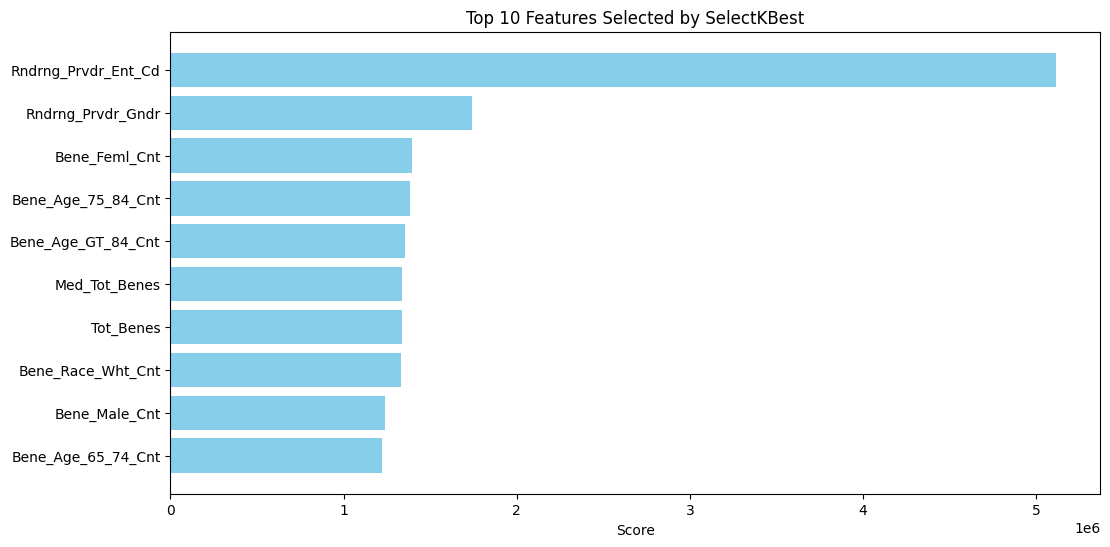

In [43]:
# Identify selected features
mask = k_best.get_support()
selected_feature_names = np.array(X.columns)[mask]
scores = k_best.scores_[mask]

# Create a DataFrame for plotting
features_scores_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Score': scores
}).sort_values(by='Score', ascending=False)

# Plot the scores
plt.figure(figsize=(12, 6))
plt.barh(features_scores_df['Feature'], features_scores_df['Score'], color='skyblue')
plt.xlabel('Score')
plt.title('Top 10 Features Selected by SelectKBest')
plt.gca().invert_yaxis()  # To have the highest score at the top
plt.show()

# # Data splitting

In [44]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((565300, 10), (141326, 10), (565300,), (141326,))

# # Algorithm Implementation

Model: XGBoost
Training Accuracy: 100.00%
Testing Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70589
           1       1.00      1.00      1.00     70737

    accuracy                           1.00    141326
   macro avg       1.00      1.00      1.00    141326
weighted avg       1.00      1.00      1.00    141326



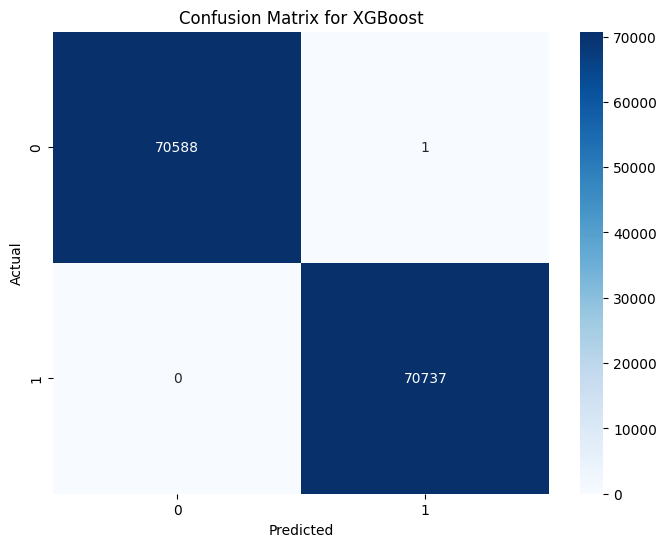

Model: AdaBoost
Training Accuracy: 100.00%
Testing Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70589
           1       1.00      1.00      1.00     70737

    accuracy                           1.00    141326
   macro avg       1.00      1.00      1.00    141326
weighted avg       1.00      1.00      1.00    141326



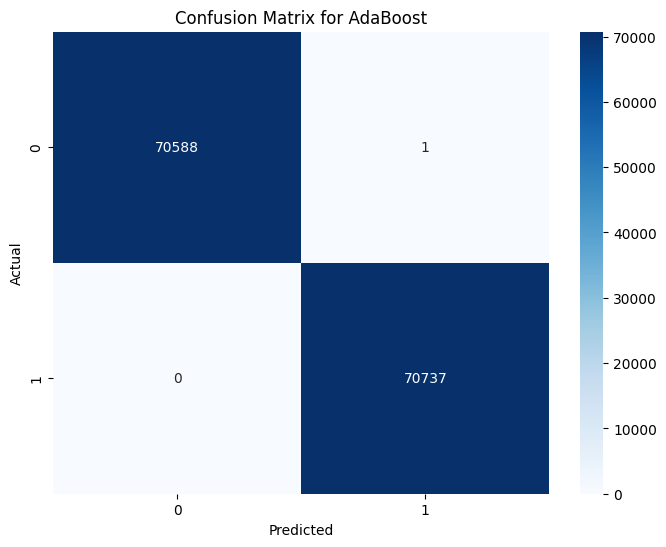

[LightGBM] [Info] Number of positive: 282576, number of negative: 282724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2045
[LightGBM] [Info] Number of data points in the train set: 565300, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499869 -> initscore=-0.000524
[LightGBM] [Info] Start training from score -0.000524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

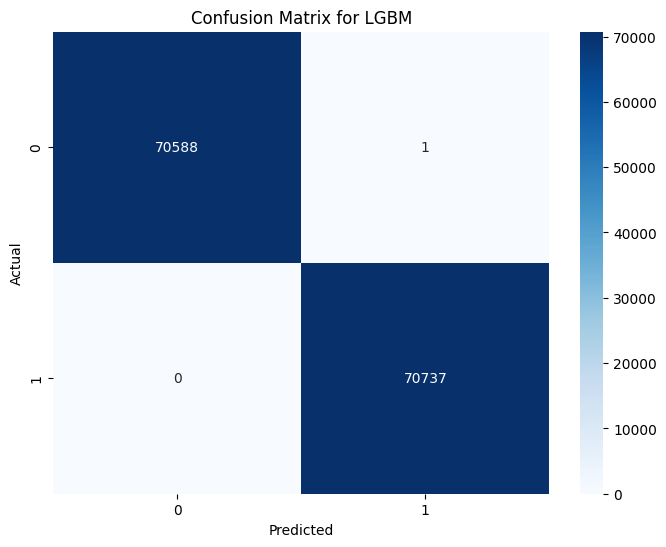

Model: Decision Tree
Training Accuracy: 100.00%
Testing Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70589
           1       1.00      1.00      1.00     70737

    accuracy                           1.00    141326
   macro avg       1.00      1.00      1.00    141326
weighted avg       1.00      1.00      1.00    141326



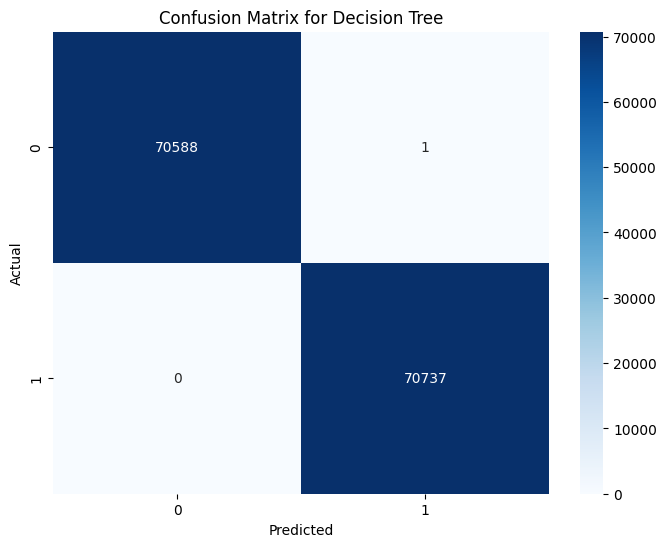

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Training Accuracy: 97.73%
Testing Accuracy: 97.75%
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     70589
           1       0.96      1.00      0.98     70737

    accuracy                           0.98    141326
   macro avg       0.98      0.98      0.98    141326
weighted avg       0.98      0.98      0.98    141326



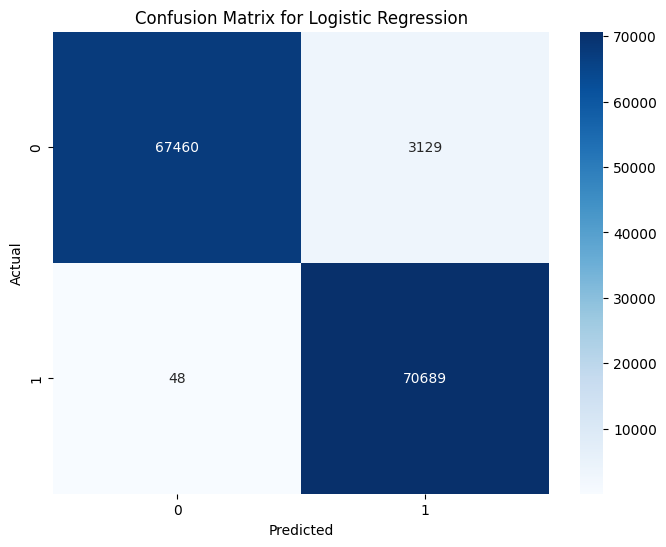

Model: Random Forest
Training Accuracy: 100.00%
Testing Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70589
           1       1.00      1.00      1.00     70737

    accuracy                           1.00    141326
   macro avg       1.00      1.00      1.00    141326
weighted avg       1.00      1.00      1.00    141326



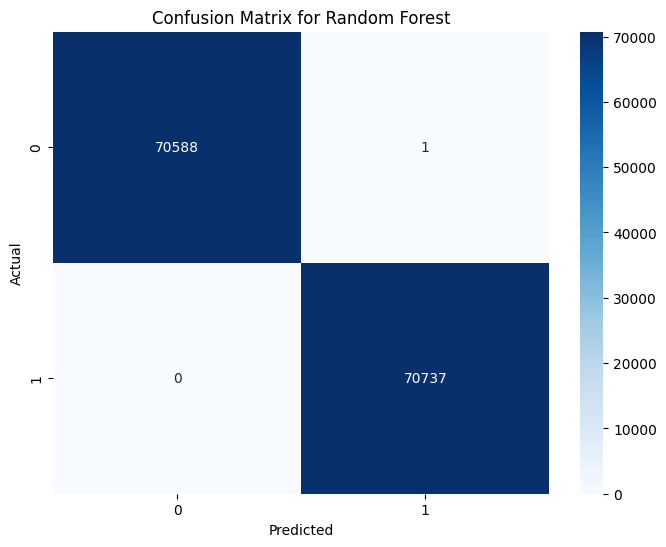

In [45]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Initialize models
models = {
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "LGBM": LGBMClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to store metrics
model_metrics = {
    "Model": [],
    "Accuracy": []
}

# Train and evaluate models
for name, model in models.items():

    # Train the model
    model.fit(X_train, y_train)
    
    # Print classification report
    print(f"Model: {name}")

    y_train_pred = model.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

    y_test_pred = model.predict(X_test)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Testing Accuracy: {testing_accuracy * 100:.2f}%")

    print(classification_report(y_test, y_test_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Save the model
    with open(f'MODELS/{name}_model.pkl', 'wb') as file:
        pickle.dump(model, file)
    
    # Save the selected features
    with open(f'MODELS/{name}_selected_features.pkl', 'wb') as file:
        pickle.dump(selected_feature_names, file)
    
    # Store metrics
    model_metrics["Model"].append(name)
    model_metrics["Accuracy"].append(accuracy_score(y_test, y_test_pred))

#### Accuracy comparision graph

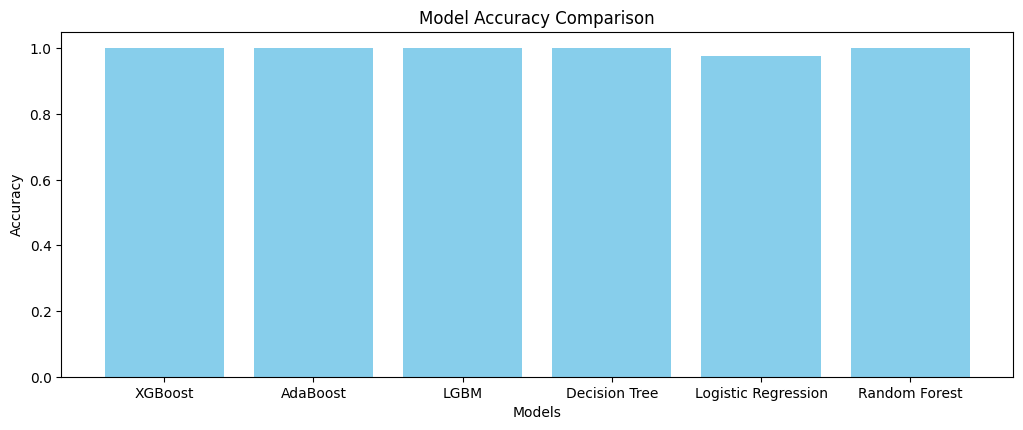

In [46]:
import pandas as pd

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Plotting the metrics
plt.figure(figsize=(20, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

#

# # Prediction part

In [47]:
data[data["Cluster"]==0].head(10)

,Rndrng_Prvdr_MI,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,...,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre,Cluster
0,26,1,0,1.0,44,1,22,420,881.0,324882.56,...,50.0,48.0,75.0,75.0,51.0,13.0,53.0,30.0,2.5578,0
1,11,1,0,1.0,73,1,19,2938,6809.0,1031724.00,...,22.0,11.0,74.0,62.0,20.0,16.0,42.0,6.0,1.0960,0
2,26,1,0,1.0,7,1,60,405,1912.0,424337.85,...,43.0,22.0,68.0,75.0,31.0,15.0,75.0,8.0,1.5455,0
5,12,0,0,1.0,44,1,33,355,1265.0,226234.00,...,23.0,11.0,75.0,73.0,19.0,11.0,39.0,6.0,1.1092,0
6,24,1,0,1.0,101,1,105,810,3035.0,965955.95,...,38.0,22.0,75.0,75.0,39.0,8.0,46.0,8.0,1.3672,0
13,0,1,0,5.0,11,1,63,810,3066.0,480894.50,...,45.0,30.0,75.0,75.0,50.0,10.0,53.0,17.0,1.5052,0
20,17,1,0,1.0,72,1,57,1079,16456.0,1963662.47,...,36.0,18.0,75.0,75.0,26.0,15.0,75.0,9.0,1.6022,0
23,26,1,0,1.0,42,1,14,262,594.0,234109.00,...,52.0,45.0,73.0,75.0,42.0,16.0,59.0,23.0,3.2847,0
25,2,0,0,1.0,69,1,104,313,3648.0,470272.00,...,29.0,22.0,73.0,75.0,30.0,24.0,75.0,8.0,1.5240,0
33,12,1,0,1.0,24,1,190,2238,3315.0,148388.00,...,44.0,31.0,75.0,75.0,46.0,15.0,53.0,22.0,1.9249,0


In [48]:
import pickle
import pandas as pd

# Load the saved model
with open('MODELS/Logistic Regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the selected features
with open('MODELS/Logistic Regression_selected_features.pkl', 'rb') as file:
    selected_feature_names = pickle.load(file)

    
# Define a function to preprocess the input data
def preprocess_input(input_data, selected_features):
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data], columns=selected_features)
    
    # Ensure the DataFrame columns match the selected features
    input_df = input_df[selected_features]
    
    return input_df


# Function to test predictions for a list of input data
def test_predictions(input_data_list):
    for index, input_data in enumerate(input_data_list):
        # Preprocess the input data
        X_input = preprocess_input(input_data, selected_feature_names)
        
        # Make the prediction
        prediction = model.predict(X_input)
        
        # Output the prediction
        print(f"Example {index + 1} - Input Data: {input_data}")
        print(f"Predicted class: {prediction[0]}")
        if prediction[0] == 0:
            print("Prediction: No Fraud")
        else:
            print("Prediction: Fraud")
        print('-' * 40)

In [49]:
# Fraud examples based on the provided table
input_data_fraud = [
    {
        'Rndrng_Prvdr_Gndr': 2,
        'Rndrng_Prvdr_Ent_Cd': 1,
        'Tot_Benes': 257606,
        'Med_Tot_Benes': 4182047.0,
        'Bene_Age_65_74_Cnt': 14.0,
        'Bene_Age_75_84_Cnt': 5.0,
        'Bene_Age_GT_84_Cnt': 40.0,
        'Bene_Feml_Cnt': 38.0,
        'Bene_Male_Cnt': 11.0,
        'Bene_Race_Wht_Cnt': 8.0
    },
    {
        'Rndrng_Prvdr_Gndr': 2,
        'Rndrng_Prvdr_Ent_Cd': 1,
        'Tot_Benes': 927847,
        'Med_Tot_Benes': 10836348.0,
        'Bene_Age_65_74_Cnt': 33.0,
        'Bene_Age_75_84_Cnt': 12.0,
        'Bene_Age_GT_84_Cnt': 75.0,
        'Bene_Feml_Cnt': 74.0,
        'Bene_Male_Cnt': 27.0,
        'Bene_Race_Wht_Cnt': 8.0
    },
    {
        'Rndrng_Prvdr_Gndr': 2,
        'Rndrng_Prvdr_Ent_Cd': 1,
        'Tot_Benes': 250926,
        'Med_Tot_Benes': 2229074.0,
        'Bene_Age_65_74_Cnt': 27.0,
        'Bene_Age_75_84_Cnt': 13.0,
        'Bene_Age_GT_84_Cnt': 66.0,
        'Bene_Feml_Cnt': 67.0,
        'Bene_Male_Cnt': 19.0,
        'Bene_Race_Wht_Cnt': 6.0
    },
    {
        'Rndrng_Prvdr_Gndr': 2,
        'Rndrng_Prvdr_Ent_Cd': 1,
        'Tot_Benes': 323214,
        'Med_Tot_Benes': 3609453.0,
        'Bene_Age_65_74_Cnt': 38.0,
        'Bene_Age_75_84_Cnt': 14.0,
        'Bene_Age_GT_84_Cnt': 75.0,
        'Bene_Feml_Cnt': 75.0,
        'Bene_Male_Cnt': 28.0,
        'Bene_Race_Wht_Cnt': 9.0
    },
    {
        'Rndrng_Prvdr_Gndr': 2,
        'Rndrng_Prvdr_Ent_Cd': 1,
        'Tot_Benes': 217328,
        'Med_Tot_Benes': 2182565.8,
        'Bene_Age_65_74_Cnt': 26.0,
        'Bene_Age_75_84_Cnt': 12.0,
        'Bene_Age_GT_84_Cnt': 75.0,
        'Bene_Feml_Cnt': 71.0,
        'Bene_Male_Cnt': 21.0,
        'Bene_Race_Wht_Cnt': 7.0
    }
]

# Test predictions for the provided fraud examples
print("Testing 'Fraud' examples:")
test_predictions(input_data_fraud)

Testing 'Fraud' examples:
Example 1 - Input Data: {'Rndrng_Prvdr_Gndr': 2, 'Rndrng_Prvdr_Ent_Cd': 1, 'Tot_Benes': 257606, 'Med_Tot_Benes': 4182047.0, 'Bene_Age_65_74_Cnt': 14.0, 'Bene_Age_75_84_Cnt': 5.0, 'Bene_Age_GT_84_Cnt': 40.0, 'Bene_Feml_Cnt': 38.0, 'Bene_Male_Cnt': 11.0, 'Bene_Race_Wht_Cnt': 8.0}
Predicted class: 1
Prediction: Fraud
----------------------------------------
Example 2 - Input Data: {'Rndrng_Prvdr_Gndr': 2, 'Rndrng_Prvdr_Ent_Cd': 1, 'Tot_Benes': 927847, 'Med_Tot_Benes': 10836348.0, 'Bene_Age_65_74_Cnt': 33.0, 'Bene_Age_75_84_Cnt': 12.0, 'Bene_Age_GT_84_Cnt': 75.0, 'Bene_Feml_Cnt': 74.0, 'Bene_Male_Cnt': 27.0, 'Bene_Race_Wht_Cnt': 8.0}
Predicted class: 1
Prediction: Fraud
----------------------------------------
Example 3 - Input Data: {'Rndrng_Prvdr_Gndr': 2, 'Rndrng_Prvdr_Ent_Cd': 1, 'Tot_Benes': 250926, 'Med_Tot_Benes': 2229074.0, 'Bene_Age_65_74_Cnt': 27.0, 'Bene_Age_75_84_Cnt': 13.0, 'Bene_Age_GT_84_Cnt': 66.0, 'Bene_Feml_Cnt': 67.0, 'Bene_Male_Cnt': 19.0, 'Ben

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [50]:
# Non Fraud examples
input_data_list = [
    {
        'Rndrng_Prvdr_Gndr': 1,
        'Rndrng_Prvdr_Ent_Cd': 1,
        'Tot_Benes': 700,
        'Med_Tot_Benes': 390,
        'Bene_Age_65_74_Cnt': 140,
        'Bene_Age_75_84_Cnt': 140,
        'Bene_Age_GT_84_Cnt': 30,
        'Bene_Feml_Cnt': 520,
        'Bene_Male_Cnt': 280,
        'Bene_Race_Wht_Cnt': 590
    },
    {
        'Rndrng_Prvdr_Gndr': 1,
        'Rndrng_Prvdr_Ent_Cd': 1,
        'Tot_Benes': 850,
        'Med_Tot_Benes': 420,
        'Bene_Age_65_74_Cnt': 150,
        'Bene_Age_75_84_Cnt': 130,
        'Bene_Age_GT_84_Cnt': 40,
        'Bene_Feml_Cnt': 530,
        'Bene_Male_Cnt': 300,
        'Bene_Race_Wht_Cnt': 600
    },
    {
        'Rndrng_Prvdr_Gndr': 1,
        'Rndrng_Prvdr_Ent_Cd': 1,
        'Tot_Benes': 600,
        'Med_Tot_Benes': 350,
        'Bene_Age_65_74_Cnt': 130,
        'Bene_Age_75_84_Cnt': 120,
        'Bene_Age_GT_84_Cnt': 20,
        'Bene_Feml_Cnt': 500,
        'Bene_Male_Cnt': 250,
        'Bene_Race_Wht_Cnt': 570
    }
]

# Test predictions for the provided data
print("Testing 'No Fraud' examples:")
test_predictions(input_data_list)

Testing 'No Fraud' examples:
Example 1 - Input Data: {'Rndrng_Prvdr_Gndr': 1, 'Rndrng_Prvdr_Ent_Cd': 1, 'Tot_Benes': 700, 'Med_Tot_Benes': 390, 'Bene_Age_65_74_Cnt': 140, 'Bene_Age_75_84_Cnt': 140, 'Bene_Age_GT_84_Cnt': 30, 'Bene_Feml_Cnt': 520, 'Bene_Male_Cnt': 280, 'Bene_Race_Wht_Cnt': 590}
Predicted class: 0
Prediction: No Fraud
----------------------------------------
Example 2 - Input Data: {'Rndrng_Prvdr_Gndr': 1, 'Rndrng_Prvdr_Ent_Cd': 1, 'Tot_Benes': 850, 'Med_Tot_Benes': 420, 'Bene_Age_65_74_Cnt': 150, 'Bene_Age_75_84_Cnt': 130, 'Bene_Age_GT_84_Cnt': 40, 'Bene_Feml_Cnt': 530, 'Bene_Male_Cnt': 300, 'Bene_Race_Wht_Cnt': 600}
Predicted class: 0
Prediction: No Fraud
----------------------------------------
Example 3 - Input Data: {'Rndrng_Prvdr_Gndr': 1, 'Rndrng_Prvdr_Ent_Cd': 1, 'Tot_Benes': 600, 'Med_Tot_Benes': 350, 'Bene_Age_65_74_Cnt': 130, 'Bene_Age_75_84_Cnt': 120, 'Bene_Age_GT_84_Cnt': 20, 'Bene_Feml_Cnt': 500, 'Bene_Male_Cnt': 250, 'Bene_Race_Wht_Cnt': 570}
Predicted clas

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
